There are times when we wish to construct a new image keeping the composition of the original while introducing wholly fresh colors or textures. It can be tough to find an Img2Img strength that retains the intended layout while also keeping the input colors.

Thus, it's time to introduce another fine-tuned model! This model incorporates depth information as additional conditioning throughout the generating process. The pipeline utilizes a depth estimation model to build a depth map, which is subsequently utilized by the fine-tuned UNet during image production. The idea is to retain the depth and structure of the initial image while providing wholly new content.


In [1]:
import torch

device = (
    "mps"
    if torch.backends.mps.is_available()
    else "cuda"
    if torch.cuda.is_available()
    else "cpu"
)

In [2]:
from diffusers import StableDiffusionDepth2ImgPipeline
import os

os.environ[
    "PYTORCH_HIP_ALLOC_CONF"] = "garbage_collection_threshold:0.9,max_split_size_mb:128"
# Load the Depth2Img pipeline (requires a suitable model)
pipe = StableDiffusionDepth2ImgPipeline.from_pretrained("stabilityai/stable-diffusion-2-depth")
pipe = pipe.to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/sajjad/PycharmProjects/my/.venv/lib/python3.10/site-packages/diffusers/models/attention_processor.py:1244: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ../aten/src/ATen/native/transformers/hip/sdp_utils.cpp:264.)
  hidden_states = F.scaled_dot_product_attention(
/home/sajjad/PycharmProjects/my/.venv/lib/python3.10/site-packages/diffusers/models/attention_processor.py:1244: UserWarning: 1Torch was not compiled with memory efficient attention. (Triggered internally at ../aten/src/ATen/native/transformers/hip/sdp_utils.cpp:320.)
  hidden_states = F.scaled_dot_product_attention(


  0%|          | 0/40 [00:00<?, ?it/s]

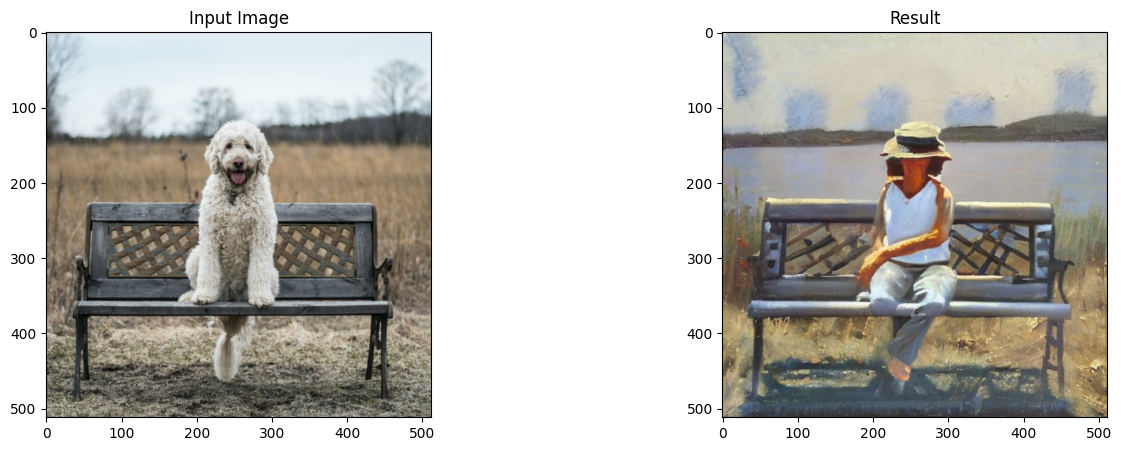

In [3]:
from matplotlib import pyplot as plt
from utils import download_image

# Inpaint with a prompt for what we want the result to look like
img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))
prompt = "An oil painting of a man on a bench"
image = pipe(prompt=prompt, image=init_image).images[0]

# View the result
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
axs[0].imshow(init_image);axs[0].set_title('Input Image')
axs[1].imshow(image);axs[1].set_title('Result');

Notice the contrast between the output and the img2img example - here, there's a far greater range of colors, while the basic structure remains true to the original. While this isn't optimal in this instance due to the weird anatomy allocated to the man to fit the dog shape, it can be incredibly helpful in certain scenarios.                                      